<a href="https://colab.research.google.com/github/y0dec/Digital-technologies/blob/main/Laba_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original DataFrame:
                 ТЭС              Владелец                Регион  \
0  Сургутская ГРЭС-2           Э.Он Россия   Ханты-Мансийский АО   
1    Рефтинская ГРЭС           Энел Россия  Свердловская область   
2   Костромская ГРЭС             Интер РАО   Костромская область   
3  Сургутская ГРЭС-1  Газпромэнергохолдинг   Ханты-Мансийский АО   
4     Рязанская ГРЭС  Газпромэнергохолдинг     Рязанская область   

  Мощность (ГВт)  
0            5,6  
1            3,8  
2            3,6  
3            3,3  
4            3,3  

Filtered DataFrame:
Empty DataFrame
Columns: [ТЭС, Владелец, Регион, Мощность (ГВт)]
Index: []

Grouped DataFrame with Mean and Sum:
                    Владелец    
                        mean sum
ТЭС                             
                         0.0   0
Ириклинская ГРЭС         0.0   0
Киришская ГРЭС           0.0   0
Конаковская ГРЭС         0.0   0
Костромская ГРЭС         0.0   0
Пермская ГРЭС            0.0   0
Рефтинская ГРЭС          0

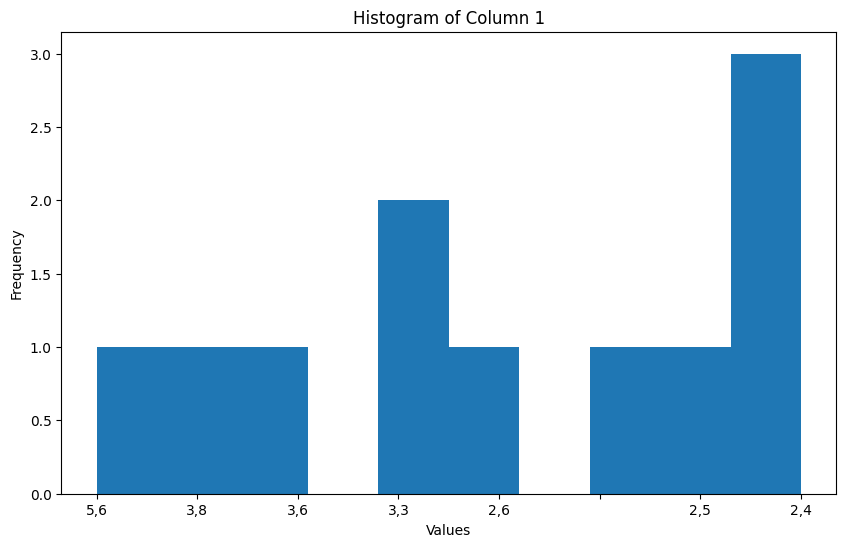

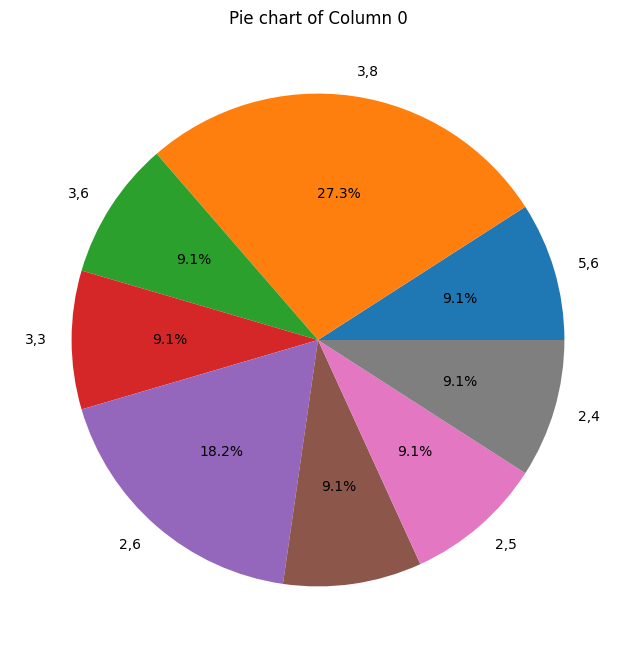

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

url = "https://www.kommersant.ru/doc/2645543"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table')

headers = [th.text.strip() for th in table.find_all('th')]

rows = []
for tr in table.find_all('tr')[1:]:  # Пропускаем заголовок таблицы
    cells = tr.find_all('td')
    if len(cells) > 0:
        row = [cell.text.strip() for cell in cells]
        rows.append(row)

df = pd.DataFrame(rows, columns=headers)
print("Original DataFrame:")
print(df.head())

df[df.columns[1]] = df[df.columns[1]].apply(lambda x: int(x.replace(',', '')) if x.replace(',', '').isdigit() else 0)
df_filtered = df[df[df.columns[1]] > 1000]
print("\nFiltered DataFrame:")
print(df_filtered.head())

grouped = df.groupby(df.columns[0]).agg({df.columns[1]: ['mean', 'sum']})
print("\nGrouped DataFrame with Mean and Sum:")
print(grouped)

plt.figure(figsize=(10, 6))
plt.hist(df[df.columns[3]], bins=10)
plt.title('Histogram of Column 1')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

labels = df[df.columns[3]].unique()
sizes = df.groupby(df.columns[3]).size()
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Pie chart of Column 0')
plt.show()

fig = px.line(df, x=df.columns[0], y=df.columns[3], title='Interactive Line Chart')
fig.show()